In [84]:
# importing libraries
import pandas as pd

import numpy as np

#data visualisation
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

import warnings; warnings.simplefilter('ignore')

In [2]:
#importing data
data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [5]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,4.328540


In [6]:
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296,1.120225
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315,0.728706
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673,2.298779
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447,0.846317
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224,5.945846


In [7]:
#Output (rows, columns)
data.shape

(729322, 12)

In [8]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance'],
      dtype='object')

In [9]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
distance              float64
dtype: object

In [10]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,3.441144
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,4.353138
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,0.000000
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,1.232697
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,2.095675
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,3.876487
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,1240.910430


In [11]:
data.dtypes[data.dtypes == "int64"]

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

In [12]:
data.dtypes[data.dtypes == "float64"]

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
distance             float64
dtype: object

In [13]:
data[['id','pickup_datetime','dropoff_datetime','store_and_fwd_flag']].head(7)

,id,pickup_datetime,dropoff_datetime,store_and_fwd_flag
0,id1080784,2016-02-29 16:40:21,2016-02-29 16:47:01,N
1,id0889885,2016-03-11 23:35:37,2016-03-11 23:53:57,N
2,id0857912,2016-02-21 17:59:33,2016-02-21 18:26:48,N
3,id3744273,2016-01-05 09:44:31,2016-01-05 10:03:32,N
4,id0232939,2016-02-17 06:42:23,2016-02-17 06:56:31,N
5,id1918069,2016-02-14 18:31:42,2016-02-14 18:55:57,N
6,id2429028,2016-04-20 20:30:14,2016-04-20 20:36:51,N


In [14]:
# typecasting store_and_fwd_flag
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')
data['vendor_id'] = data['vendor_id'].astype('category')

# checking dtype
data[['store_and_fwd_flag', 'vendor_id']].dtypes

store_and_fwd_flag    category
vendor_id             category
dtype: object

In [15]:
# creating instance of date time
p_date = pd.DatetimeIndex(data['pickup_datetime'])
d_date = pd.DatetimeIndex(data['dropoff_datetime'])

data[['pickup_datetime']].dtypes

pickup_datetime    object
dtype: object

In [16]:
# extracting columns

data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()

data['pickup_day_no']=data['pickup_datetime'].dt.weekday
data['dropoff_day_no']=data['dropoff_datetime'].dt.weekday

data['pickup_hour']=data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour

data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

data[['pickup_datetime']].dtypes

pickup_datetime    datetime64[ns]
dtype: object

In [17]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,1.199074,Monday,Monday,0,0,16,16,2,2
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,4.129117,Friday,Friday,4,4,23,23,3,3
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,7.250763,Sunday,Sunday,6,6,17,18,2,2
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2.361101,Tuesday,Tuesday,1,1,9,10,1,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,4.328540,Wednesday,Wednesday,2,2,6,6,2,2


In [18]:
# Check if there are any null values
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
distance              0
pickup_day            0
dropoff_day           0
pickup_day_no         0
dropoff_day_no        0
pickup_hour           0
dropoff_hour          0
pickup_month          0
dropoff_month         0
dtype: int64

In [19]:
# check for unique elements
data.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
distance              726245
pickup_day                 7
dropoff_day                7
pickup_day_no              7
dropoff_day_no             7
pickup_hour               24
dropoff_hour              24
pickup_month               6
dropoff_month              7
dtype: int64

In [20]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'
    
data['pickup_timeofday'] = data['pickup_hour'].apply(time_of_day)
data['dropoff_timeofday'] = data['dropoff_hour'].apply(time_of_day)


In [21]:
# pip install geopy

In [29]:
from geopy.distance import great_circle

def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 return great_circle(start_coordinates,stop_coordinates).km

In [38]:
data['distance'] = data.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

<AxesSubplot:xlabel='trip_duration', ylabel='Count'>

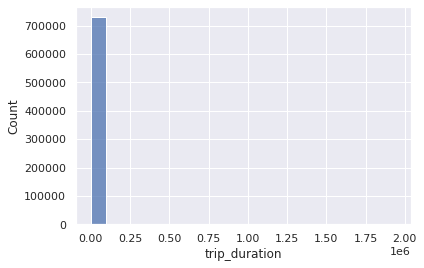

In [47]:
# the result is very skewed

sns.histplot(data['trip_duration'],kde=False,bins=20)

<AxesSubplot:xlabel='trip_duration'>

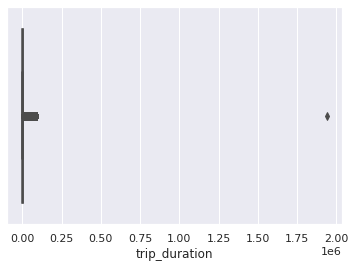

In [49]:
# in box plot there's an outlier

sns.boxplot(data['trip_duration'])

In [50]:
data['trip_duration'].sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
672240          1
102646          1
533760          1
512833          1
622664          1
Name: trip_duration, Length: 729322, dtype: int64

In [51]:
# dropping the outlier row

data.drop(data[data['trip_duration'] == 1939736].index, inplace = True)

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

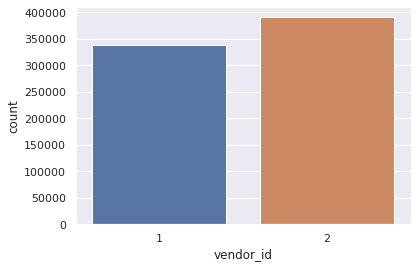

In [52]:
sns.countplot(x='vendor_id',data=data)

In [56]:
data.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

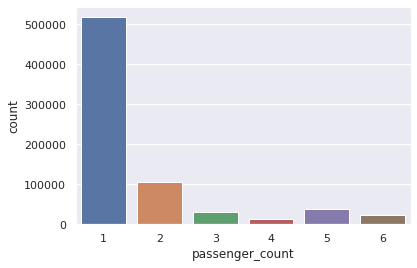

In [57]:
sns.countplot(x='passenger_count',data=data)

In [55]:
# Removing 7 0 and 9 passengers

data=data[data['passenger_count']!=0]
data=data[data['passenger_count']<=6]

In [60]:
data['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994463
Y    0.005537
Name: store_and_fwd_flag, dtype: float64

In [61]:
data['distance'].value_counts()

0.000000    2893
0.000424      20
0.000424      18
0.000424      18
0.000424      11
            ... 
2.929161       1
0.977650       1
0.925223       1
4.112012       1
5.945846       1
Name: distance, Length: 726219, dtype: int64

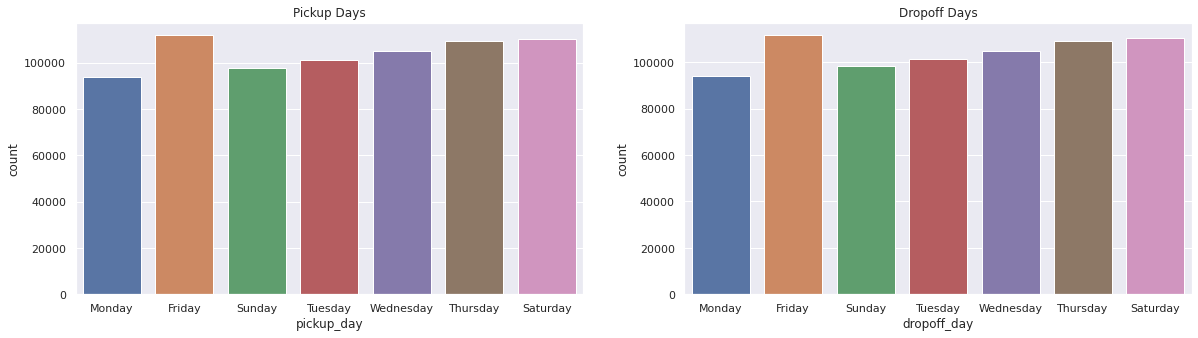

In [78]:
############## Univariate analysis####################


# trips per day

figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))

ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=data,ax=ax1)

ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=data,ax=ax2)

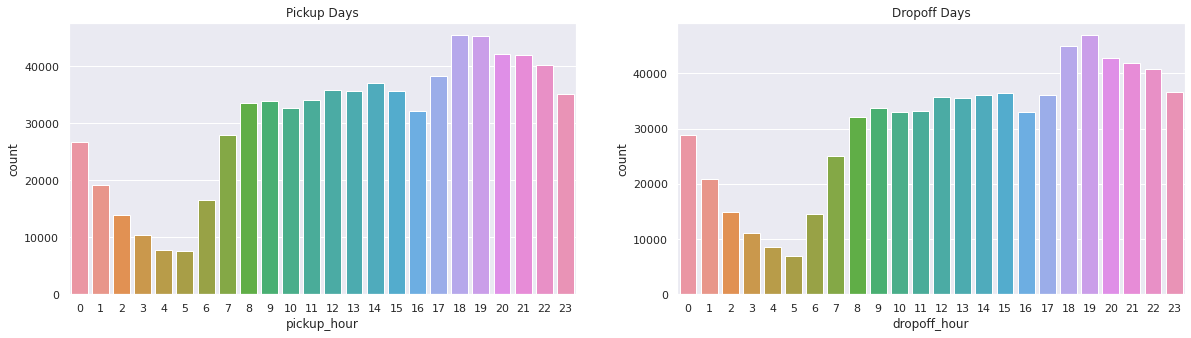

In [79]:
# Trips per Hour

figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))

ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=data,ax=ax9)

ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=data,ax=ax10)

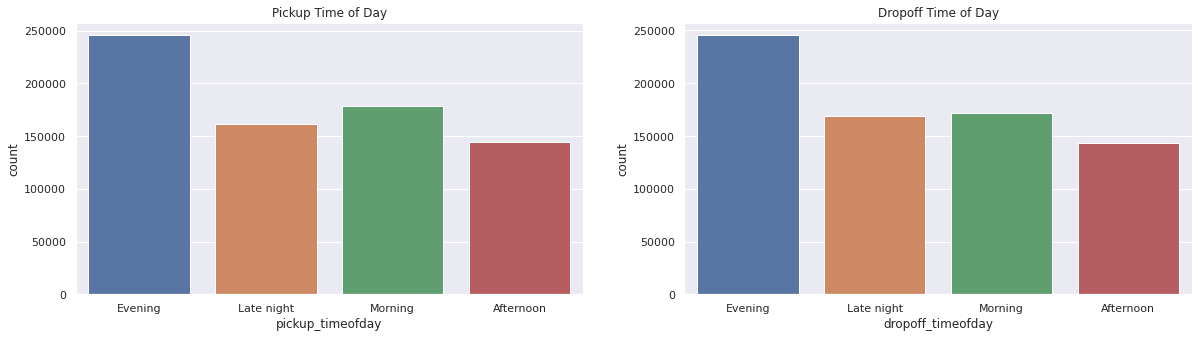

In [80]:
# trips per time of day

figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))

ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=data,ax=ax3)

ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=data,ax=ax4)

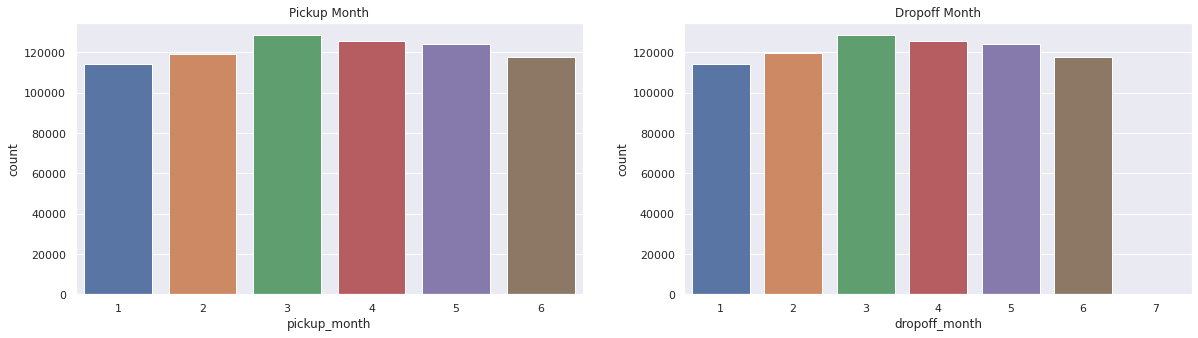

In [82]:
# Trips per month

figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(20,5))

ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=data,ax=ax11)

ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=data,ax=ax12)

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

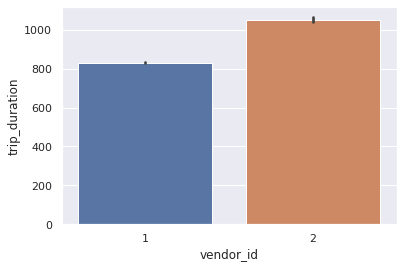

In [85]:
############## Bivariate analysis####################

# trip duration per vendor
sns.barplot(y='trip_duration',x='vendor_id',data=data,estimator=np.mean)

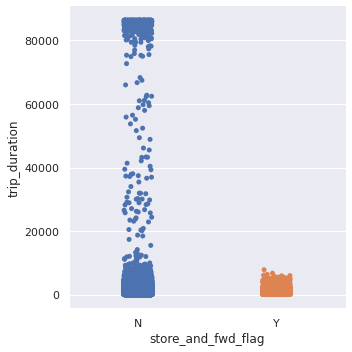

In [87]:
# Trip Duration per Store and Forward Flag

sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=data,kind="strip")

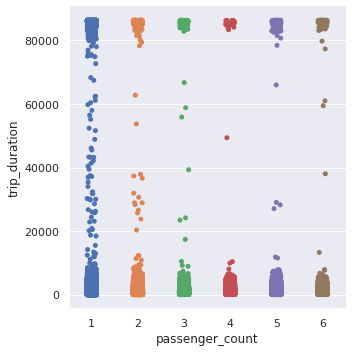

In [89]:
# Trip Duration per passenger count

sns.catplot(y='trip_duration',x='passenger_count',data=data,kind="strip")

<AxesSubplot:xlabel='pickup_hour', ylabel='trip_duration'>

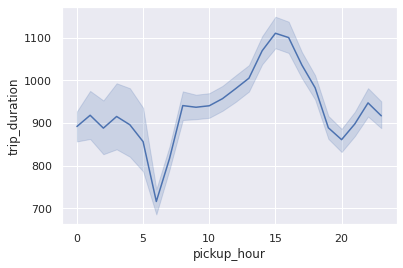

In [91]:
# trip duration per hour

sns.lineplot(x='pickup_hour',y='trip_duration',data=data)

<AxesSubplot:xlabel='pickup_timeofday', ylabel='trip_duration'>

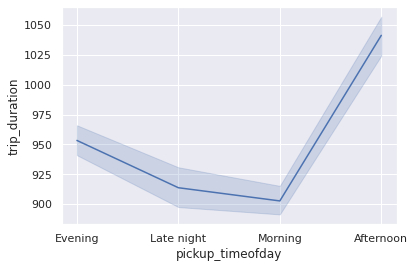

In [93]:
# Trip Duration per time of day

sns.lineplot(x='pickup_timeofday',y='trip_duration',data=data)

<AxesSubplot:xlabel='pickup_day_no', ylabel='trip_duration'>

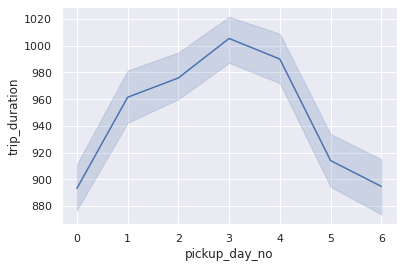

In [95]:
# Trip Duration per Day of Week

sns.lineplot(x='pickup_day_no',y='trip_duration',data=data)

<AxesSubplot:xlabel='pickup_month', ylabel='trip_duration'>

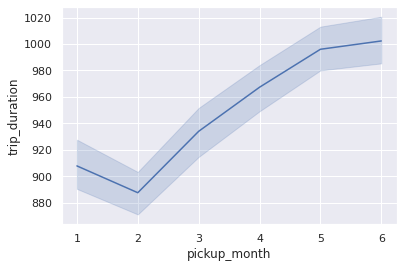

In [96]:
# Trip Duration per month

sns.lineplot(x='pickup_month',y='trip_duration',data=data)

<AxesSubplot:xlabel='vendor_id', ylabel='distance'>

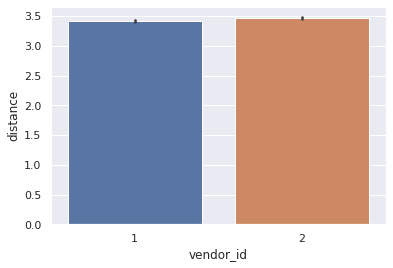

In [97]:
# Distance and Vendor

sns.barplot(y='distance',x='vendor_id',data=data,estimator=np.mean)

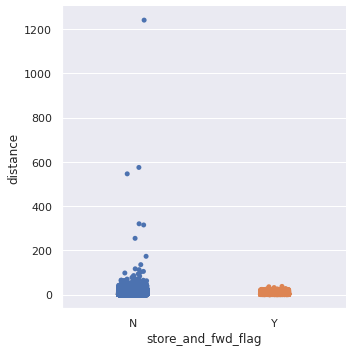

In [98]:
# Distance and Store and Forward Flag

sns.catplot(y='distance',x='store_and_fwd_flag',data=data,kind="strip")

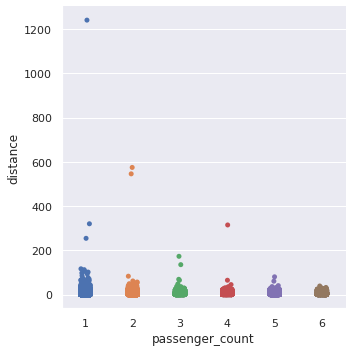

In [99]:
# Distance per passenger count

sns.catplot(y='distance',x='passenger_count',data=data,kind="strip")

<AxesSubplot:xlabel='pickup_day_no', ylabel='distance'>

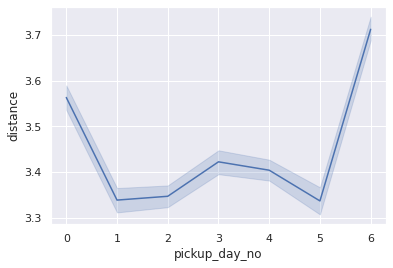

In [100]:
# Distance per day of week

sns.lineplot(x='pickup_day_no',y='distance',data=data)

<AxesSubplot:xlabel='pickup_hour', ylabel='distance'>

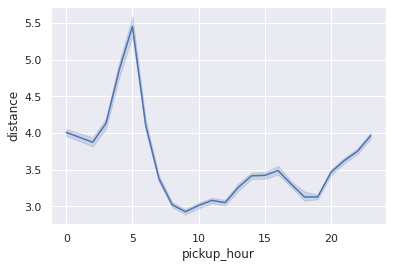

In [101]:
# Distance per hour of day

sns.lineplot(x='pickup_hour',y='distance',data=data)

<AxesSubplot:xlabel='pickup_timeofday', ylabel='distance'>

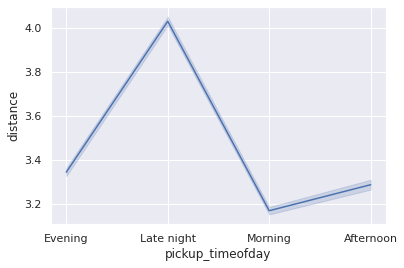

In [102]:
# Distance per time of day

sns.lineplot(x='pickup_timeofday',y='distance',data=data)

<AxesSubplot:xlabel='pickup_month', ylabel='distance'>

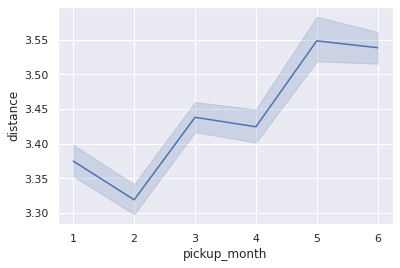

In [103]:
# Distance per month

sns.lineplot(x='pickup_month',y='distance',data=data)

<AxesSubplot:xlabel='vendor_id', ylabel='passenger_count'>

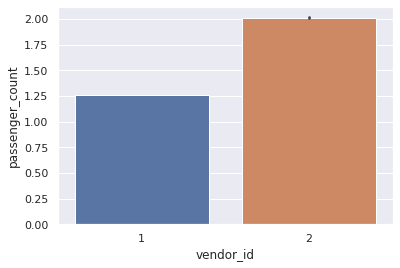

In [104]:
# Passenger Count and Vendor id

sns.barplot(y='passenger_count',x='vendor_id',data=data)

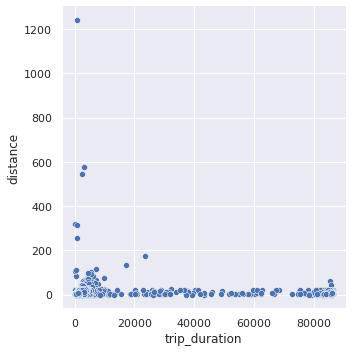

In [105]:
# Trip Duration and Distance

sns.relplot(y=data.distance,x='trip_duration',data=data)

In [107]:
data[data.distance == 0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday
263,id3155891,2,2016-06-28 11:21:00,2016-06-28 11:25:00,2,-73.996422,40.298828,-73.996422,40.298828,N,...,Tuesday,Tuesday,1,1,11,11,6,6,Morning,Morning
327,id0786923,2,2016-03-26 13:34:38,2016-03-26 13:37:17,1,-73.996323,40.753460,-73.996323,40.753460,N,...,Saturday,Saturday,5,5,13,13,3,3,Afternoon,Afternoon
795,id2323213,2,2016-06-13 16:49:52,2016-06-13 17:04:49,5,-73.967171,40.763500,-73.967171,40.763500,N,...,Monday,Monday,0,0,16,17,6,6,Evening,Evening
1176,id3235868,1,2016-02-29 21:39:52,2016-02-29 21:44:08,1,-73.995232,40.744038,-73.995232,40.744038,N,...,Monday,Monday,0,0,21,21,2,2,Evening,Evening
1257,id1865738,2,2016-03-13 11:38:36,2016-03-13 12:00:46,2,-73.912781,40.804428,-73.912781,40.804428,N,...,Sunday,Sunday,6,6,11,12,3,3,Morning,Afternoon
